In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/03-cities.csv',encoding='tis620')
df.head()

,city,country,latitude,longitude,temperature,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Aalborg,Denmark,57.03,9.92,7.52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abisko,Sweden,63.35,18.83,0.20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adana,Turkey,36.99,35.32,18.67,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albacete,Spain,39.00,-1.87,12.62,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.iloc[:,:5]
df.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


# Plot between Long and latitude

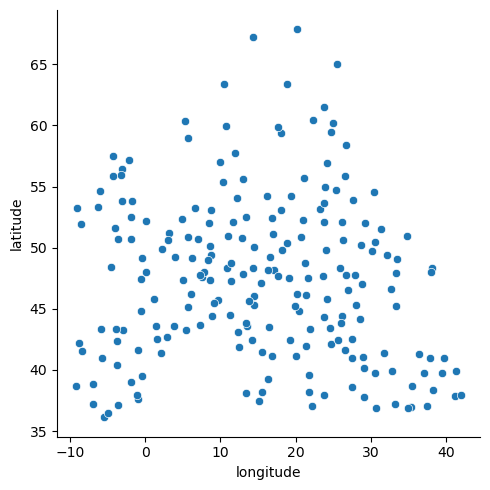

In [4]:
sns.relplot(data=df, x="longitude",y='latitude')
plt.show()

# Kmean

In [5]:
from sklearn.cluster import KMeans

In [6]:
X = df[['latitude','longitude']]

In [7]:
km_cluster = KMeans(n_clusters=8) #อยากจัดกลุ่ม 8 กลุ่ม
km_cluster.fit(X)

KMeans()

In [8]:
km_cluster.labels_

array([5, 7, 5, 4, 0, 0, 7, 2, 3, 0, 7, 4, 4, 3, 6, 2, 6, 0, 6, 6, 0, 3,
       2, 4, 7, 3, 2, 5, 2, 1, 2, 6, 0, 7, 7, 5, 2, 2, 0, 6, 7, 7, 0, 6,
       3, 2, 7, 1, 3, 2, 6, 3, 6, 0, 6, 1, 3, 7, 7, 0, 3, 2, 6, 6, 6, 6,
       6, 7, 3, 6, 1, 3, 6, 2, 7, 7, 7, 6, 3, 1, 2, 4, 4, 6, 7, 3, 2, 2,
       7, 4, 2, 2, 7, 5, 0, 3, 2, 2, 3, 2, 1, 4, 1, 0, 2, 2, 7, 6, 3, 4,
       2, 1, 4, 6, 1, 6, 5, 1, 3, 5, 6, 6, 7, 2, 0, 3, 0, 3, 1, 2, 0, 2,
       4, 4, 5, 6, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 3, 3, 5, 4, 1, 5, 3,
       1, 0, 3, 3, 0, 3, 3, 1, 6, 6, 3, 5, 2, 2, 1, 3, 1, 3, 5, 6, 0, 2,
       4, 0, 3, 6, 4, 4, 3, 3, 6, 5, 5, 6, 7, 3, 1, 1, 4, 1, 6, 0, 4, 3,
       3, 5, 1, 5, 0, 3, 0, 1, 1, 3, 6, 0, 6, 6, 2])

In [9]:
kmc_s = pd.Series(km_cluster.labels_,name='kmean',dtype='category')
df['kmean'] = kmc_s
df.head()

,city,country,latitude,longitude,temperature,kmean
0,Aalborg,Denmark,57.03,9.92,7.52,5
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,7
2,Abisko,Sweden,63.35,18.83,0.20,5
3,Adana,Turkey,36.99,35.32,18.67,4
4,Albacete,Spain,39.00,-1.87,12.62,0


# Clustering plot

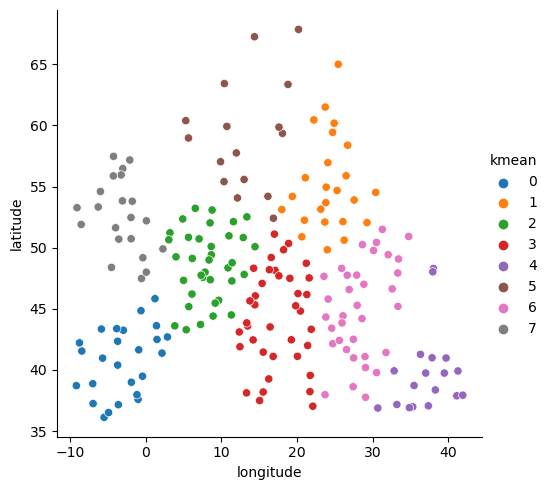

In [10]:
sns.relplot(data=df, x="longitude",y='latitude',hue='kmean')
plt.show()

## plot center ของแต่ละ K 

In [11]:
km_cluster.cluster_centers_

array([[40.7492    , -3.0516    ],
       [55.23125   , 24.25708333],
       [48.60777778,  8.27944444],
       [44.23921053, 17.40947368],
       [39.82888889, 37.16555556],
       [59.175     , 13.245     ],
       [44.97628571, 28.39514286],
       [52.58761905, -3.11904762]])

In [12]:
center = pd.DataFrame(km_cluster.cluster_centers_,columns=['lat','long'])

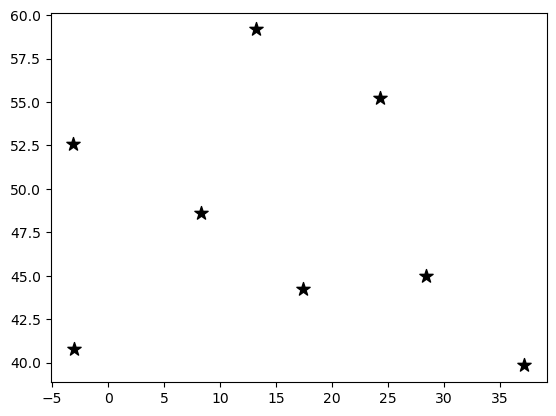

In [13]:
plt.scatter(x=center['long'],y=center['lat'], marker='*',s=100, color='black')
plt.show()

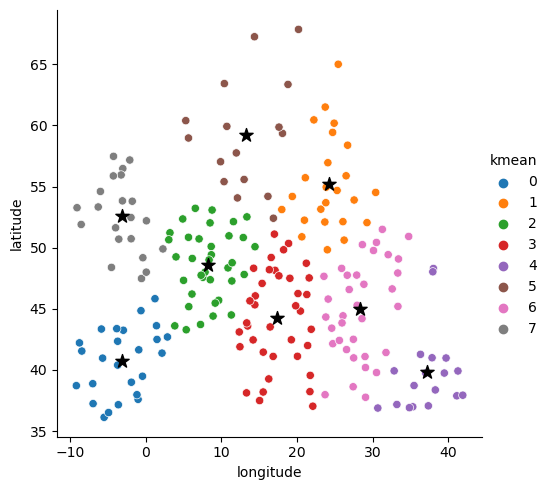

In [14]:
sns.relplot(data=df, x="longitude",y='latitude',hue='kmean')
plt.scatter(x=center['long'],y=center['lat'], marker='*',s=100, color='black')
plt.show()

In [15]:
km_cluster.labels_

array([5, 7, 5, 4, 0, 0, 7, 2, 3, 0, 7, 4, 4, 3, 6, 2, 6, 0, 6, 6, 0, 3,
       2, 4, 7, 3, 2, 5, 2, 1, 2, 6, 0, 7, 7, 5, 2, 2, 0, 6, 7, 7, 0, 6,
       3, 2, 7, 1, 3, 2, 6, 3, 6, 0, 6, 1, 3, 7, 7, 0, 3, 2, 6, 6, 6, 6,
       6, 7, 3, 6, 1, 3, 6, 2, 7, 7, 7, 6, 3, 1, 2, 4, 4, 6, 7, 3, 2, 2,
       7, 4, 2, 2, 7, 5, 0, 3, 2, 2, 3, 2, 1, 4, 1, 0, 2, 2, 7, 6, 3, 4,
       2, 1, 4, 6, 1, 6, 5, 1, 3, 5, 6, 6, 7, 2, 0, 3, 0, 3, 1, 2, 0, 2,
       4, 4, 5, 6, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 3, 3, 5, 4, 1, 5, 3,
       1, 0, 3, 3, 0, 3, 3, 1, 6, 6, 3, 5, 2, 2, 1, 3, 1, 3, 5, 6, 0, 2,
       4, 0, 3, 6, 4, 4, 3, 3, 6, 5, 5, 6, 7, 3, 1, 1, 4, 1, 6, 0, 4, 3,
       3, 5, 1, 5, 0, 3, 0, 1, 1, 3, 6, 0, 6, 6, 2])

<h2> จัดกลุ่มใหม่ </h2>

In [16]:
km_cluster.fit(X)
km_cluster.labels_

array([1, 6, 0, 4, 3, 3, 1, 1, 5, 3, 6, 4, 7, 5, 7, 1, 2, 3, 2, 2, 3, 5,
       1, 4, 6, 5, 1, 1, 1, 2, 1, 2, 3, 6, 6, 0, 5, 1, 3, 2, 6, 6, 3, 7,
       5, 1, 6, 2, 5, 1, 7, 5, 7, 3, 7, 0, 5, 6, 6, 3, 5, 1, 2, 2, 2, 2,
       7, 6, 5, 7, 2, 5, 7, 1, 6, 6, 6, 7, 5, 0, 1, 4, 4, 7, 6, 5, 1, 1,
       6, 4, 1, 1, 6, 0, 3, 5, 1, 1, 5, 1, 0, 4, 2, 3, 1, 1, 6, 7, 7, 4,
       1, 2, 4, 2, 2, 2, 0, 0, 5, 0, 2, 2, 6, 1, 3, 5, 3, 5, 2, 1, 3, 1,
       4, 4, 0, 7, 3, 1, 2, 5, 1, 1, 2, 1, 1, 3, 1, 7, 5, 1, 4, 2, 0, 5,
       0, 3, 5, 7, 3, 5, 5, 2, 7, 7, 5, 0, 5, 1, 0, 5, 2, 5, 1, 7, 3, 5,
       4, 3, 5, 7, 4, 4, 7, 5, 7, 1, 0, 2, 6, 5, 0, 0, 4, 2, 7, 3, 4, 5,
       7, 0, 0, 0, 3, 5, 3, 2, 2, 5, 4, 3, 2, 4, 1])

**การจัดกลุ่มเปลี่ยนไป เพราะ kmean เกิดจากการสุ่ม**

In [17]:
kmc_s = pd.Series(km_cluster.labels_,name='kmean2',dtype='category')
df['kmean2'] = kmc_s
df.head()

,city,country,latitude,longitude,temperature,kmean,kmean2
0,Aalborg,Denmark,57.03,9.92,7.52,5,1
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,7,6
2,Abisko,Sweden,63.35,18.83,0.20,5,0
3,Adana,Turkey,36.99,35.32,18.67,4,4
4,Albacete,Spain,39.00,-1.87,12.62,0,3


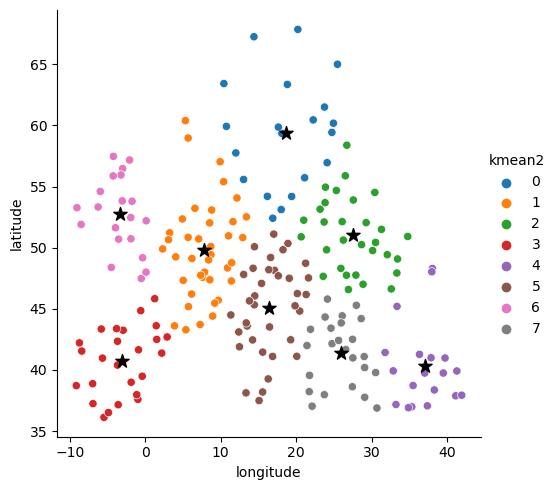

In [18]:
sns.relplot(data=df, x="longitude",y='latitude',hue='kmean2')
center = pd.DataFrame(km_cluster.cluster_centers_,columns=['lat','long'])
plt.scatter(x=center['long'],y=center['lat'], marker='*',s=100, color='black')
plt.show()

In [19]:
km_cluster.inertia_

4669.619921316918

# Performance

## inertia

**n_init คือการ run หลายๆรอบเพื่อวัดค่า inertia (ไม่ต้องสร้าง Kmeanหลายรอบ)**

In [20]:
km_inertia = KMeans(8, n_init=1000)
km_inertia.fit(X)
km_inertia.inertia_

4666.063630315227

**ไม่สามารถใช้ inertia มาหาค่า K ได้เนื่องจากเวลาเพิ่ม K ค่า inertia จะลดลง(แปลว่าดีขึ้น)ตัวอย่างที่เห็นได้ชัดคือ K = จำนวนdataset**

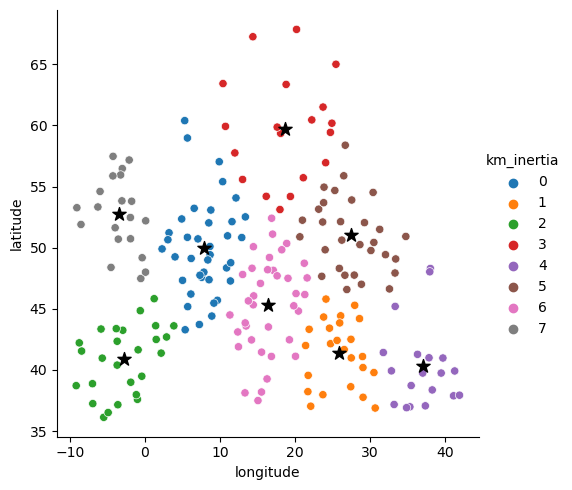

In [21]:
sns.relplot(data=df, x="longitude",y='latitude',hue=pd.Series(km_inertia.labels_,name='km_inertia',dtype='category'))
center = pd.DataFrame(km_inertia.cluster_centers_,columns=['lat','long'])
plt.scatter(x=center['long'],y=center['lat'], marker='*',s=100, color='black')
plt.show()

## หาค่า K ที่ดีที่สุดโดยใช้ Eblow

In [22]:
results = []
for k in range(2,12):
    km = KMeans(k,n_init=100)
    km.fit(X)
    results.append((k,km.inertia_))

In [23]:
results_df = pd.DataFrame(results,columns=['k','inertia'])
results_df

,k,inertia
0,2,19930.716255
1,3,13444.109382
2,4,10244.216825
3,5,8201.426890
4,6,6604.774052
5,7,5415.353502
6,8,4670.137481
7,9,4013.364944
8,10,3461.715657
9,11,3093.707724


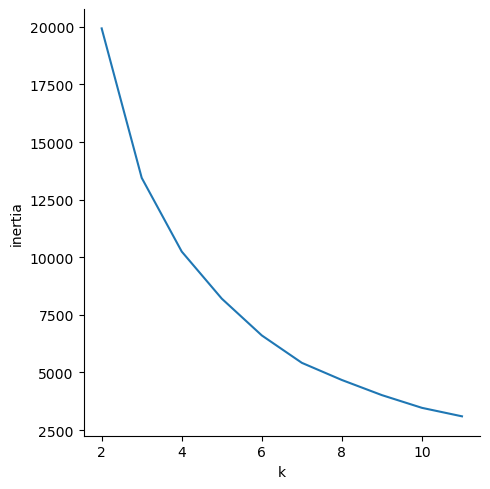

In [24]:
sns.relplot(data=results_df, x='k',y='inertia',kind='line')
plt.show()

**eblow 6-8**

## Silhouette coefficient

**วัดว่าเหมือนกับเพื่อนใน cluster มากแค่ไหน inertia วัดแค่ตัวมันเอง**

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
results = []
for k in range(2,12):
    km = KMeans(k,n_init=100)
    km.fit(X)
    results.append((k,km.inertia_,silhouette_score(X,km.labels_)))

In [27]:
results_df = pd.DataFrame(results,columns=['k','inertia','silhouette'])
results_df

,k,inertia,silhouette
0,2,19930.716255,0.462491
1,3,13444.301258,0.385635
2,4,10253.710150,0.381200
3,5,8201.426890,0.363819
4,6,6604.774052,0.375997
5,7,5412.175552,0.382252
6,8,4669.787523,0.382220
7,9,4008.369445,0.392447
8,10,3460.324055,0.414820
9,11,3088.942178,0.398485


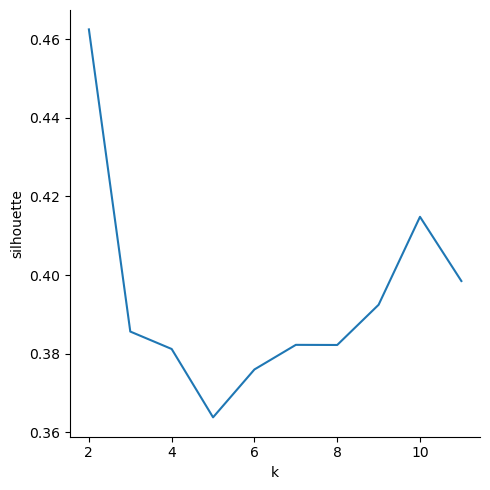

In [28]:
sns.relplot(data=results_df, x='k',y='silhouette',kind='line')
plt.show()

**K ประมาณ 7-10**

# DBScan

**วัดด้วย silhouette** </br>
**-1 คือจัดกลุ่มไม่ได้** </br>
**ทำให้ silhouette แย่**

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbs = DBSCAN(eps=2.3,min_samples=5) #รัศมี  จน.ขั้นต่ำ 4
dbs.fit(X)

DBSCAN(eps=2.3)

In [31]:
df['dbscan'] = pd.Series(dbs.labels_,dtype="category")

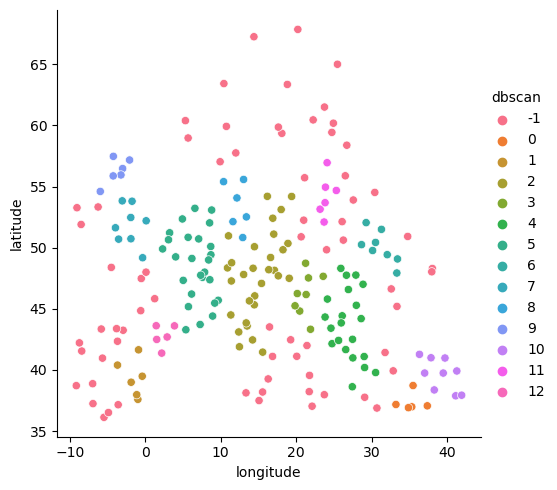

In [32]:
sns.relplot(data=df, x="longitude",y='latitude',hue=df.dbscan)
plt.show()


In [33]:
silhouette_score(X,dbs.labels_)

-0.00397244878352255

In [34]:
from sklearn.metrics import silhouette_samples

In [35]:
silhouette_samples(X,dbs.labels_)

array([-0.75750034,  0.55806224, -0.49782157,  0.68770307,  0.66563525,
       -0.79210726, -0.09932044,  0.29330729,  0.3480615 ,  0.6480998 ,
       -0.76167055, -0.84720152, -0.80833518,  0.69526658, -0.65097724,
       -0.09175668,  0.30754259, -0.77569657,  0.38526392, -0.11905578,
        0.55111158, -0.60326586,  0.52433351,  0.44312497,  0.33220039,
        0.65432828,  0.23823118, -0.53325707,  0.58548335,  0.71076694,
       -0.10169314,  0.68480809, -0.79891103,  0.51494732, -0.0241268 ,
       -0.407028  ,  0.10516213,  0.37866815, -0.8142488 ,  0.1004941 ,
        0.60356338,  0.19334441, -0.71137945,  0.40329637,  0.08766666,
       -0.31603511, -0.79865592,  0.58072743,  0.23466311,  0.05393991,
        0.4102303 , -0.46512445,  0.55174781, -0.82302697,  0.28836068,
       -0.12794637, -0.15055737,  0.45285314,  0.46600333,  0.61401221,
       -0.43994134,  0.36066066,  0.7043485 ,  0.67680289, -0.00228691,
       -0.10881356,  0.45387228, -0.75020759, -0.52006402, -0.14